# Ordination and Dimensionality Reduction
Multidimensional scaling is an ordination method suited for 0-inflated data like microbiome OTU abundances that reveal proportionate abundance of taxonomic bacterial groups in a sample. To compare 3 methods, let's use the scikit MDS, NMDS and PCA analysis functions. We will then plot the outcome as a scatterplot annotated by sample type.

**Here are some datasets to try:**

Microbiome dataset 1: Gut microbiome from Chow (Normal) vs HFD (High Fat Diet) mice from the publication: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4297748/

dataset 2: acne vs. perioral dermatitis vs. control skin microbiome: https://www.ncbi.nlm.nih.gov/bioproject/PRJNA636582

File2:
https://raw.githubusercontent.com/PineBiotech/omicslogic/master/skin_microbiome_Abundance_table_marked1.txt

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

#load data
df = pd.read_table('https://raw.githubusercontent.com/PineBiotech/omicslogic/master/skin_microbiome_Abundance_table_marked1.txt',sep='\t',header=(0)) 

In [ ]:
df.shape

df.describe

<bound method NDFrame.describe of             id SRR11961372 SRR11961374          SRR11961376 SRR11961380  \
0        Group        none  adult acne  perioral dermatitis  adult acne   
1        OTU_1       11432      150251                17543       11092   
2        OTU_2           0       17275                44749           0   
3        OTU_3           0        1300                    0           0   
4        OTU_4        3823        6145                 3975         518   
...        ...         ...         ...                  ...         ...   
2356  OTU_2356           0           0                    0           0   
2357  OTU_2357           0           0                    0           0   
2358  OTU_2358           0           0                    0           0   
2359  OTU_2359           0           0                    0           0   
2360  OTU_2360           0           0                    0           0   

     SRR11961381          SRR11961383 SRR11961389          SRR119

In [ ]:
#set labels
labels_list = df.loc[[0]] 

#Make a list of sample names
sample_names = df.loc[0] 
sample_names = list(df)[1:] 

#Make unique list of labels
labels = np.unique(labels_list) 

#delete "Group" label 
labels = np.delete(labels, np.where(labels == 'Group')) 

#Remove row "Group" at index 0 from data
data=df.drop([0]) 

#Remove id from axis
data=data.drop(['id'], axis=1) 
data = data.transpose() 

#Get list of all labels
flabels = labels_list.loc[0,:].values[1:] 

In [ ]:
labels

In [ ]:
#scale data
from sklearn.preprocessing import StandardScaler 
from sklearn import manifold

scaled = StandardScaler() 
scaled.fit(data) 
scaled_data = scaled.transform(data) 

#import libraries for ploting and scaling
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

#MDS
mds = MDS(2,random_state=0)
XMDS = mds.fit_transform(scaled_data)

#NMDS
nmds = manifold.MDS(n_components=2, random_state=0, metric=False, max_iter=3000)
XNMDS = nmds.fit_transform(scaled_data)

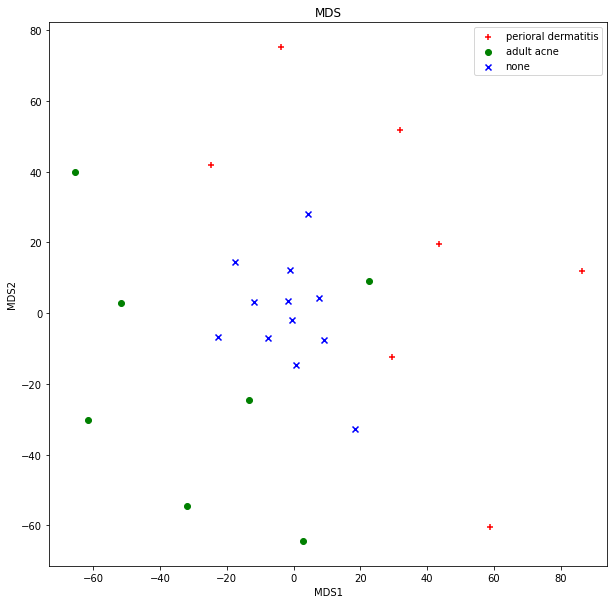

In [ ]:
# plot MDS

MDS1 = 0 
MDS2 = 1 

plt.figure(figsize=(10, 10))

for i in range(0, XMDS.shape[0]): 
  if flabels[i] == 'perioral dermatitis': 
    c1 = plt.scatter(XMDS[i,MDS1],XMDS[i,MDS2], c='r', marker='+') 
#    plt.text(XMDS[i,MDS1],XMDS[i,MDS2], sample_names[i]) 
  elif flabels[i] == 'adult acne': 
    c2 = plt.scatter(XMDS[i,MDS1],XMDS[i,MDS2], c='g', marker='o') 
#    plt.text(XMDS[i,MDS1],XMDS[i,MDS2], sample_names[i]) 
  elif flabels[i] == 'none': 
    c3 = plt.scatter(XMDS[i,MDS1],XMDS[i,MDS2], c='b', marker='x') 
#    plt.text(XMDS[i,MDS1],XMDS[i,MDS2], sample_names[i]) 

#Add labels to MDS scatterplot:
plt.legend([c1, c2, c3],['perioral dermatitis', 'adult acne', 'none']) 

plt.xlabel('MDS1') 
plt.ylabel('MDS2') 
plt.title('MDS')
plt.show() 

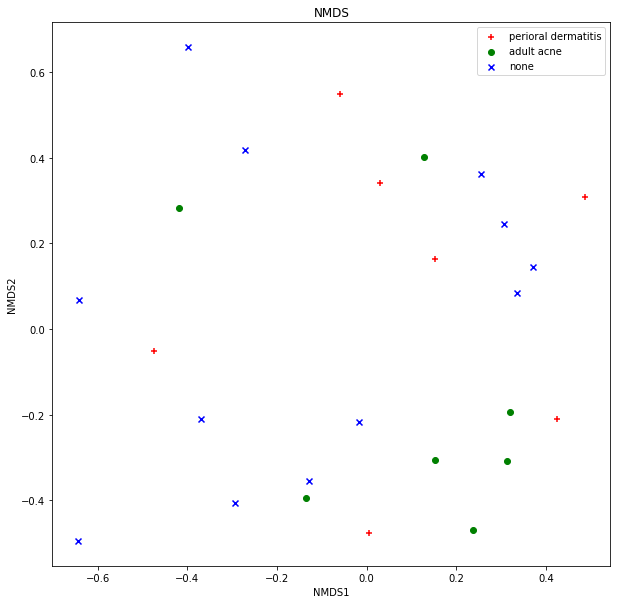

In [ ]:
#NMDS
NMDS1 = 0 
NMDS2 = 1 

plt.figure(figsize=(10, 10))

for i in range(0, XNMDS.shape[0]): 
  if flabels[i] == 'perioral dermatitis': 
    c1 = plt.scatter(XNMDS[i,NMDS1],XNMDS[i,NMDS2], c='r', marker='+') 
#    plt.text(XNMDS[i,NMDS1],XNMDS[i,NMDS2], sample_names[i]) 
  elif flabels[i] == 'adult acne': 
    c2 = plt.scatter(XNMDS[i,NMDS1],XNMDS[i,NMDS2], c='g', marker='o') 
#    plt.text(XNMDS[i,NMDS1],XNMDS[i,NMDS2], sample_names[i]) 
  elif flabels[i] == 'none': 
    c3 = plt.scatter(XNMDS[i,NMDS1],XNMDS[i,NMDS2], c='b', marker='x') 
#    plt.text(XNMDS[i,NMDS1],XNMDS[i,NMDS2], sample_names[i]) 

#Add labels to PCA scatterplot:
plt.legend([c1, c2, c3],['perioral dermatitis', 'adult acne', 'none']) 
plt.xlabel('NMDS1') 
plt.ylabel('NMDS2') 
plt.title('NMDS')
plt.show() 

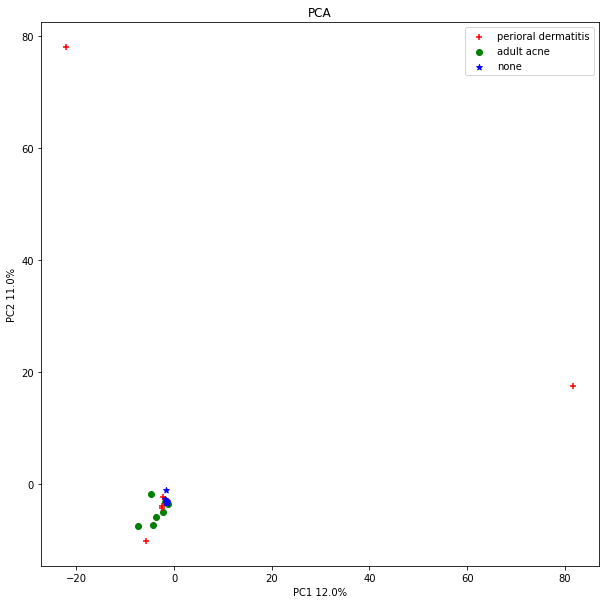

In [ ]:
#Run Principal Component Analysis
from sklearn.decomposition import PCA 

pca = PCA(n_components=2) 
pca.fit(scaled_data) 
xpca = pca.transform(scaled_data)

PC1 = 0 
PC2 = 1 

plt.figure(figsize=(10, 10))

for i in range(0, xpca.shape[0]): 
  if flabels[i] == 'perioral dermatitis': 
    c1 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='r', marker='+') 
#    plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i]) 
  elif flabels[i] == 'adult acne': 
    c2 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='g', marker='o') 
#    plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i]) 
  elif flabels[i] == 'none': 
    c3 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='b', marker='*') 
#    plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i]) 

#Add labels to PCA scatterplot:
plt.legend([c1, c2, c3],['perioral dermatitis', 'adult acne', 'none']) 
plt.xlabel(f'PC1 {round(pca.explained_variance_ratio_[0],2)*100}%') 
plt.ylabel(f'PC2 {round(pca.explained_variance_ratio_[1],2)*100}%') 
plt.title('PCA')
plt.show() 

Assignment:

compare PCA with and without scaling to tSNE and MDS using 2 datasets - a low dimensional one and a high dimensional one

tSNE notebook: https://colab.research.google.com/drive/1QBLoCrMVoAWuNb5fXOLRrEGDIO096w6r?usp=sharing




# Cancer (LIHC/BRCA) Dataset


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#load data
df = pd.read_table('https://raw.githubusercontent.com/PineBiotech/omicslogic/master/LIHC_BRCA_data1_marked.txt',sep='\t',header=(0)) 

In [ ]:
df

,Id,TCGA-2V-A95S-01A-11R-A37K-07_LIHC_TP,TCGA-2Y-A9GS-01A-12R-A38B-07_LIHC_TP,TCGA-2Y-A9GU-01A-11R-A38B-07_LIHC_TP,TCGA-BC-A10Q-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10T-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10W-11A-11R-A131-07_LIHC_NT,TCGA-3C-AAAU-01A-11R-A41B-07_BRCA_TP,TCGA-3C-AALJ-01A-31R-A41B-07_BRCA_TP,TCGA-3C-AALK-01A-11R-A41B-07_BRCA_TP,TCGA-A7-A0CE-11A-21R-A089-07_BRCA_NT,TCGA-A7-A0CH-11A-32R-A089-07_BRCA_NT,TCGA-A7-A0D9-11A-53R-A089-07_BRCA_NT
0,class,LIHC_TP,LIHC_TP,LIHC_TP,LIHC_NT,LIHC_NT,LIHC_NT,BRCA_TP,BRCA_TP,BRCA_TP,BRCA_NT,BRCA_NT,BRCA_NT
1,a100130426,0,0,0,0,0,0,0,0.9066,0,0,0,0
2,a100133144,2.31,53.59,6.86,2,1.41,4.94,16.3644,11.6228,12.0894,4.3333,4.2087,3.055
3,a100134869,5.69,5.41,6.14,0,2.59,1.06,12.9316,9.2294,11.0799,3.9206,2.1852,0
4,a10357,138.3,144.07,73.93,103.92,96.89,97.03,52.1503,154.2974,143.8643,78.9238,53.638,87.5764
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20527,ZYX|7791,4869,10756,3708,2799,1661,4915,3507.2482,5458.7489,5691.3529,6455.873,6038.9281,2344.7047
20528,ZZEF1|23140,1366,1533,1606,493,320,638,1894.9342,942.883,781.1336,1314.2857,1477.386,1997.9633
20529,ZZZ3|26009,783,1746,412,486,694,482,1180.4565,509.5195,700.8688,968.254,620.9685,730.6517
20530,psiTPTE22|387590,6,13,3,14,2,13,1.7233,35.3581,66.6115,265.3968,466.7607,346.7413


[0.24768801 0.2038904 ]
[[-0.0012274   0.01066299  0.00208601 ...  0.0090453  -0.00641099
   0.01118854]
 [-0.0041151  -0.00513896 -0.00987175 ... -0.0075267  -0.00595549
   0.00044475]]
1164.0696937722619


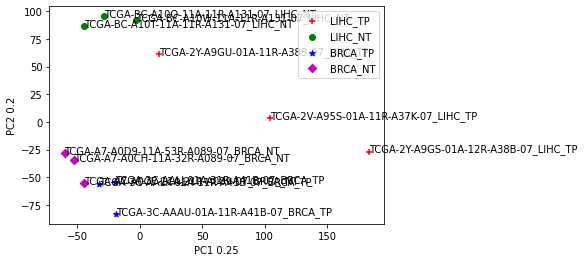

In [ ]:
#make a list of sample names, delete 'Id' label, scale data
sample_names = df.loc[0]
sample_names = list(df)[1:]
labels_list = df.loc[[0]]
flabels = labels_list.loc[0,:].values[1:]
labels = np.unique(labels_list)
labels = np.delete(labels, np.where(labels == 'Group'))
data = df.drop([0])
df_T = df.transpose()
df_T = df_T.drop(['Id'])
df_T = df_T.drop(columns=df_T.columns[0], axis=1)
scaled = StandardScaler()
scaled.fit(df_T)
scaled_data = scaled.transform(df_T)

# Run Principal Component Analysis
pca = PCA(n_components=2)
pca.fit(scaled_data)
xpca = pca.transform(scaled_data)
print(pca.explained_variance_ratio_)
print(pca.components_)
print(pca.noise_variance_)

PC1 = 0
PC2 = 1
for i in range(0, xpca.shape[0]):
  if flabels[i] == 'LIHC_TP':
    c1 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='r', marker='+')
    plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i])
  elif flabels[i] == 'LIHC_NT':
    c2 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='g', marker='o')
    plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i])
  elif flabels[i] == 'BRCA_TP':
    c3 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='b', marker='*')
    plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i])
  elif flabels[i] == 'BRCA_NT':
    c4 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='m', marker='D')
    plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i])

# Add labels to PCA scatterplot:
plt.legend([c1, c2, c3, c4],['LIHC_TP', 'LIHC_NT', 'BRCA_TP', 'BRCA_NT'])
plt.xlabel(f'PC1 {round(pca.explained_variance_ratio_[0],2)}')
plt.ylabel(f'PC2 {round(pca.explained_variance_ratio_[1],2)}')
plt.show()

Question: what is your conclusion from the analysis, is malignancy or tissue type a more significant factor differentiating between the samples?



*   From looking at the figures, tissue type looks like a more significant factor differentating between samples
*   LIHC_TP samples didn't show clusters



# Ebola Dataset


In [ ]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# I couldn't figure out how to fix the error when uploading using the different method so I used this method that I learned about online
from google.colab import files
uploaded= files.upload()

Saving EBV_PRJNA386278_HZlog_Zaire1995 (1).txt to EBV_PRJNA386278_HZlog_Zaire1995 (1) (1).txt


In [ ]:
#Load data
df=pd.read_table("EBV_PRJNA386278_HZlog_Zaire1995 (1).txt")

[0.4420075  0.13857802]
[[-0.00280325 -0.00212772 -0.00214362 ... -0.00347833 -0.00411211
  -0.00350446]
 [-0.00043055 -0.0018045  -0.0017741  ...  0.00041283  0.0006046
   0.00042019]]
1277.9484190386418


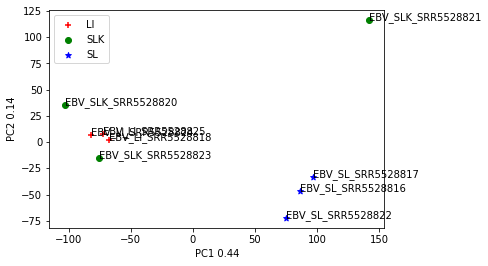

In [ ]:
#make a list of sample names, delete 'kchain_Pos_Nuc1' label, scale data
sample_names = df.loc[0]
sample_names = list(df)[1:]
df = df.drop(['kchain_Pos_Nucl'], axis = 1)
df_T = df.transpose()
scaled = StandardScaler()
scaled.fit(df_T)
scaled_data = scaled.transform(df_T)

# Run Principal Component Analysis
pca = PCA(n_components=2)
pca.fit(scaled_data)
xpca = pca.transform(scaled_data)
print(pca.explained_variance_ratio_)
print(pca.components_)
print(pca.noise_variance_)

PC1 = 0
PC2 = 1
flabels = ["LI","LI","LI","SLK","SLK","SLK","SL","SL","SL"]
for i in range(0, xpca.shape[0]):
  if flabels[i] == 'LI':
    c1 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='r', marker='+')
    plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i])
  elif flabels[i] == 'SLK':
    c2 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='g', marker='o')
    plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i])
  elif flabels[i] == 'SL':
    c3 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='b', marker='*')
    plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i])

# Add labels to PCA scatterplot:
plt.legend([c1, c2, c3],['LI', 'SLK', 'SL'])
plt.xlabel(f'PC1 {round(pca.explained_variance_ratio_[0],2)}')
plt.ylabel(f'PC2 {round(pca.explained_variance_ratio_[1],2)}')
plt.show()

Question: what are the “phenotypes” separating these genomic sequences?

From looking at the data, I conclude: 

*   Tissue type is a factor separating genomic sequences for LI and SL samples 
*   Sample EBV_SLK_SRR5528821) is an outlier


*   SLK tissue types were not clustered properly, indicating they may be more diverse in phenotype
*   List item





# Microbiome Dataset

In [ ]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving Microbiome_example.txt to Microbiome_example.txt


In [ ]:
#Load data
df=pd.read_table("Microbiome_example.txt")

[0.37472706 0.2407951 ]
[[ 0.03744316  0.04289175  0.07420046  0.05635253  0.04382063  0.01582066
   0.01623448  0.0419416   0.05312146 -0.02699395  0.09208204  0.05664551
   0.05832422  0.04601465  0.09669529  0.06259745  0.0106604   0.03929435
   0.08420226 -0.05330714  0.09222058 -0.06393732 -0.00466893 -0.02699395
  -0.07035915 -0.05650619  0.01244666 -0.02699395 -0.02763667  0.04048951
   0.         -0.05489493  0.00426707 -0.04275304  0.09533703 -0.06414393
  -0.05543678  0.08415321  0.07633136  0.08701104  0.07955289  0.02617954
   0.0447214   0.08266464 -0.05359315  0.05119185  0.05748073 -0.06435774
   0.0824999  -0.02822774  0.07620797  0.02493062  0.08265074  0.
  -0.04316993  0.07606774  0.00235721  0.06100948  0.08051261  0.04698463
   0.07341354  0.         -0.04324449  0.02057253 -0.0472022   0.06874941
   0.         -0.07044412 -0.06180006 -0.04914295  0.01933549 -0.06356205
   0.03290611 -0.04294324 -0.06052503  0.08867938 -0.03090143  0.08631354
   0.03733405 -0.00631

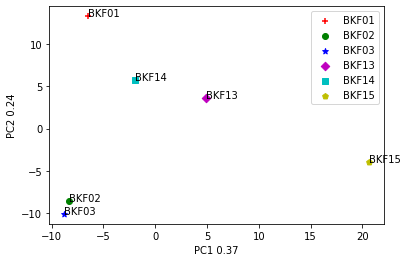

In [ ]:
#make a list of sample names, delete 'BKCM1' label, scale data
sample_names = df.loc[0]
sample_names = list(df)[1:]
flabels = sample_names
df_T = df.transpose()
df_T = df_T.drop(index='BKCM1')
#df_T = df_T.apply(pd.to_numeric, errors="ignore")

scaled = StandardScaler()
scaled.fit(df_T)
scaled_data = scaled.transform(df_T)

# Run Principal Component Analysis
pca = PCA(n_components=2)
pca.fit(scaled_data)
xpca = pca.transform(scaled_data)
print(pca.explained_variance_ratio_)
print(pca.components_)
print(pca.noise_variance_)

PC1 = 0
PC2 = 1
for i in range(0, xpca.shape[0]):
  if flabels[i] == 'BKF01':
    c1 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='r', marker='+')
    plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i])
  elif flabels[i] == 'BKF02':
    c2 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='g', marker='o')
    plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i])
  elif flabels[i] == 'BKF03':
    c3 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='b', marker='*')
    plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i])
  elif flabels[i] == 'BKF13':
    c4 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='m', marker='D')
    plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i])
  elif flabels[i] == 'BKF14':
    c5 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='c', marker='s')
    plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i])
  elif flabels[i] == 'BKF15':
    c6 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='y', marker='p')
    plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i])

# Add labels to PCA scatterplot:
plt.legend([c1, c2, c3, c4, c5, c6],['BKF01', 'BKF02', 'BKF03', 'BKF13', 'BKF14', 'BKF15'])
plt.xlabel(f'PC1 {round(pca.explained_variance_ratio_[0],2)}')
plt.ylabel(f'PC2 {round(pca.explained_variance_ratio_[1],2)}')
plt.show()

Question:  how is this PCA different from others? 



*    PCA is different in that it didn't categorize samples into general groups 
*   PCA shows that BKF02 and BKF03 cluster together
*   Although we will need to confirm, it is assumed that the samples that clustered together are similar to each other






# Understand PCA representation

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# To study noise ration, we will compare ratio of specific genes with all the genes in the dataset
# Dataset genes:
genes = pd.read_table('https://raw.githubusercontent.com/PineBiotech/omicslogic/master/LIHC_BRCA_data1_marked.txt',sep='\t',header=(0))
data=genes.drop([0]) 
data=data.drop(['Id'], axis=1) 
data = data.transpose() 
scaled = StandardScaler()
scaled.fit(data)
scaled_data = scaled.transform(data)
pca = PCA(n_components=2)
pca.fit(scaled_data)
print('PCA (n=2) Noise Variance:\nAll genes: ',pca.noise_variance_)

# Soecific genes:
genes_select = pd.read_table('https://raw.githubusercontent.com/PineBiotech/omicslogic/master/LIHC_BRCA_data1_marked.txt',sep='\t',header=(0))
data_select=genes_select.drop([0]) 
data_select=data_select.drop(['Id'], axis=1) 
data_select = data_select.transpose() 
scaled = StandardScaler()
scaled.fit(data_select)
scaled_data = scaled.transform(data_select)
pca_select = PCA(n_components=2)
pca_select.fit(scaled_data)
print('Select genes: ',pca_select.noise_variance_)
print('Noise Ratio (select/all): ',pca_select.noise_variance_/pca.noise_variance_)

# 3 Principal Components (instead of 2):
scaled = StandardScaler()
scaled.fit(data)
scaled_data = scaled.transform(data)
pca = PCA(n_components=3)
pca.fit(scaled_data)
print('\nPCA (n=3) Noise Variance:\nAll genes: ',pca.noise_variance_)
scaled = StandardScaler()
scaled.fit(data_select)
scaled_data = scaled.transform(data_select)
pca_select = PCA(n_components=3)
pca_select.fit(scaled_data)
print('Select genes: ',pca_select.noise_variance_)
print('Noise Ratio (select/all): ',pca_select.noise_variance_/pca.noise_variance_)

NameError: ignored

Noise: what is the relationship between noise, components, number of samples and number of features in a dataset?

Noise variance describes the mean of the difference between two groups. The above example shows that the more components, the less the noise variance.